In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
with open('bank-additional.csv') as f: 
    df = pd.read_csv(f, delimiter=';')
df.head(10)
#input

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [2]:
#xem thong tin cac thuoc tinh cua bang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [3]:
#xem danh gia so bo cac thuoc tinh
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
#pdays la so ngay contact cuoi toi hien tai
no_cont = df['pdays'].value_counts(1)
no_cont
#hon 96% khong contact, thuoc tinh nay khong anh huong output bai toan, co the loai bo

999    0.961156
3      0.012624
6      0.010197
4      0.003399
7      0.002428
10     0.001942
12     0.001214
5      0.000971
2      0.000971
9      0.000728
1      0.000728
13     0.000486
18     0.000486
16     0.000486
15     0.000486
0      0.000486
14     0.000243
19     0.000243
21     0.000243
17     0.000243
11     0.000243
Name: pdays, dtype: float64

In [5]:
df = df.replace('unknown',np.nan)
df.head(12)
#thay the unknown bang null de tien hanh lam sach du lieu

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,NaN,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,NaN,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)
#xem 5 thuoc tinh co gia tri null nhieu nhat

,Total,%
default,803,19.5
education,167,4.1
housing,105,2.5
loan,105,2.5
job,39,0.9


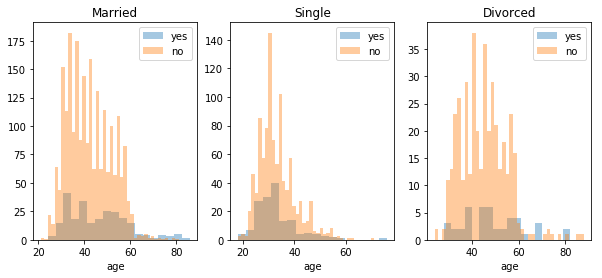

In [7]:
y = 'yes'
no_y = 'no'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
married = df[df['marital']=='married']
single = df[df['marital']=='single']
divorced = df[df['marital']=='divorced']
ax = sns.distplot(married[married['y']=='yes'].age.dropna(), bins=18, label = y, ax = axes[0], kde =False)
ax = sns.distplot(married[married['y']=='no'].age.dropna(), bins=40, label = no_y, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Married')
ax = sns.distplot(single[single['y']=='yes'].age.dropna(), bins=18, label = y, ax = axes[1], kde = False)
ax = sns.distplot(single[single['y']=='no'].age.dropna(), bins=40, label = no_y, ax = axes[1], kde = False)
ax.legend()
ax = ax.set_title('Single')
ax = sns.distplot(divorced[divorced['y']=='yes'].age.dropna(), bins=18, label = y, ax = axes[2], kde = False)
ax = sns.distplot(divorced[divorced['y']=='no'].age.dropna(), bins=40, label = no_y, ax = axes[2], kde = False)
ax.legend()
_ = ax.set_title('Divorced')
#danh gia thuoc tinh tinh trang hon nhan, do tuoi, co anh huong den y, giu lai

In [8]:
df = df.drop(['month'], axis=1)
df = df.drop(['day_of_week'], axis=1)
df = df.drop(['pdays'], axis=1)
df = df.drop(['poutcome'], axis=1)
#xoa bo cac thuoc tinh khong can thiet, cac thuoc tinh nay lien quan pdays nhung khong anh huong y

In [9]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,346,4,0,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,227,1,0,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,17,3,0,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,128,3,2,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,290,4,0,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,NaN,yes,no,cellular,44,2,0,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,68,1,1,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,NaN,no,no,telephone,170,1,0,1.1,93.994,-36.4,4.855,5191.0,no


In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(17)
#xem lai cac thuoc tinh con du lieu null

,Total,%
default,803,19.5
education,167,4.1
housing,105,2.5
loan,105,2.5
job,39,0.9
marital,11,0.3
y,0,0.0
contact,0,0.0
duration,0,0.0
nr.employed,0,0.0


In [11]:
#tien hanh thay the null bang du lieu can thiet
df['default'].describe()

count     3316
unique       2
top         no
freq      3315
Name: default, dtype: object

In [12]:
common_value = 'no'

for dataset in [df]:
    dataset['default']=dataset['default'].fillna(common_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
age               4119 non-null int64
job               4080 non-null object
marital           4108 non-null object
education         3952 non-null object
default           4119 non-null object
housing           4014 non-null object
loan              4014 non-null object
contact           4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
previous          4119 non-null int64
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(4), object(8)
memory usage: 547.1+ KB


In [13]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,346,4,0,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,227,1,0,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,17,3,0,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,128,3,2,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,290,4,0,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,no,yes,no,cellular,44,2,0,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,68,1,1,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,no,no,no,telephone,170,1,0,1.1,93.994,-36.4,4.855,5191.0,no


In [14]:
df['education'].describe()

count                  3952
unique                    7
top       university.degree
freq                   1264
Name: education, dtype: object

In [15]:
common_value = 'university.degree'

for dataset in [df]:
    dataset['education']=dataset['education'].fillna(common_value)

In [16]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,346,4,0,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,227,1,0,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,17,3,0,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,128,3,2,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,290,4,0,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,no,yes,no,cellular,44,2,0,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,68,1,1,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,no,no,no,telephone,170,1,0,1.1,93.994,-36.4,4.855,5191.0,no


In [17]:
df['housing'].describe()

count     4014
unique       2
top        yes
freq      2175
Name: housing, dtype: object

In [18]:
common_value = 'yes'

for dataset in [df]:
    dataset['housing']=dataset['housing'].fillna(common_value)

In [19]:
df['loan'].describe()

count     4014
unique       2
top         no
freq      3349
Name: loan, dtype: object

In [20]:
common_value = 'no'

for dataset in [df]:
    dataset['loan']=dataset['loan'].fillna(common_value)

In [21]:
df['job'].describe()

count       4080
unique        11
top       admin.
freq        1012
Name: job, dtype: object

In [22]:
common_value = 'admin.'

for dataset in [df]:
    dataset['job']=dataset['job'].fillna(common_value)

In [23]:
df['marital'].describe()

count        4108
unique          3
top       married
freq         2509
Name: marital, dtype: object

In [24]:
common_value = 'married'

for dataset in [df]:
    dataset['marital']=dataset['marital'].fillna(common_value)

In [25]:
df['contact'].describe()

count         4119
unique           2
top       cellular
freq          2652
Name: contact, dtype: object

In [26]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,346,4,0,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,227,1,0,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,yes,no,telephone,17,3,0,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,128,3,2,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,290,4,0,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,no,yes,no,cellular,44,2,0,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,68,1,1,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,no,no,no,telephone,170,1,0,1.1,93.994,-36.4,4.855,5191.0,no


In [29]:
#thay yes no trong y thanh 1 0 de phan tich su anh huong cac thuoc tinh khac den y
df = df.replace('no',0)
df = df.replace('yes',1)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,0,1,0,cellular,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,0,0,0,telephone,346,4,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,0,1,0,telephone,227,1,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,0,1,0,telephone,17,3,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,0,1,0,cellular,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,0,0,0,cellular,128,3,2,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,0,1,0,cellular,290,4,0,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,0,1,0,cellular,44,2,0,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,0,0,0,cellular,68,1,1,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,0,0,0,telephone,170,1,0,1.1,93.994,-36.4,4.855,5191.0,0


In [36]:
avrcont = df['duration'].mean()
avrcont

256.7880553532411

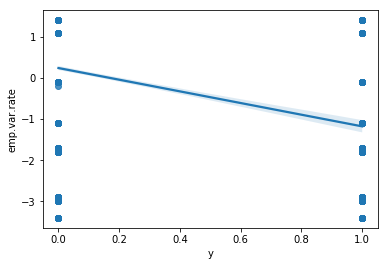

In [41]:
sns.regplot(x="y", y="emp.var.rate", data=df);

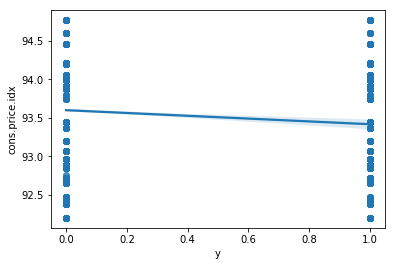

In [42]:
sns.regplot(x="y", y="cons.price.idx", data=df);

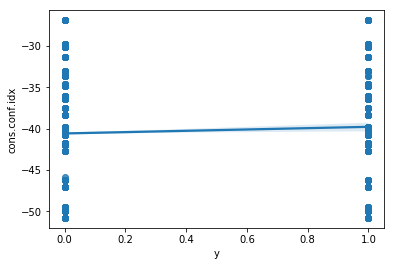

In [43]:
sns.regplot(x="y", y="cons.conf.idx", data=df);

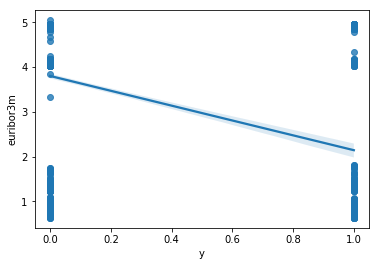

In [45]:
sns.regplot(x="y", y="euribor3m", data=df);

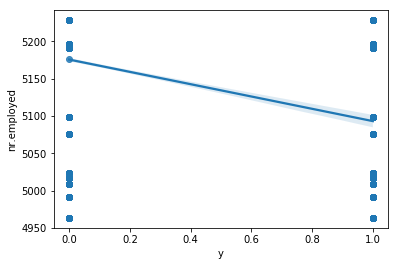

In [46]:
sns.regplot(x="y", y="nr.employed", data=df);

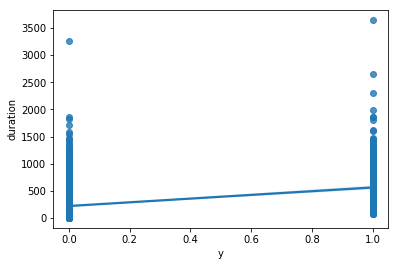

In [47]:
sns.regplot(x="y", y="duration", data=df);

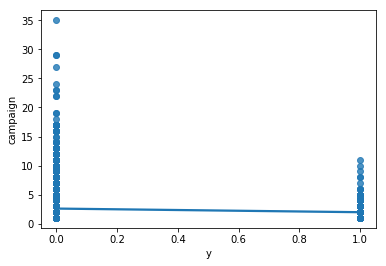

In [48]:
sns.regplot(x="y", y="campaign", data=df);

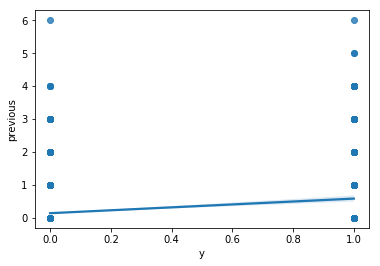

In [49]:
sns.regplot(x="y", y="previous", data=df);

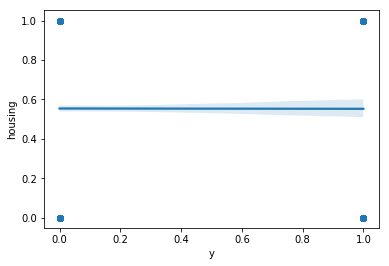

In [50]:
sns.regplot(x="y", y="housing", data=df);

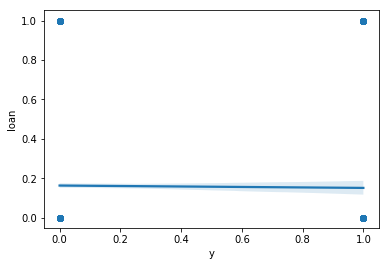

In [51]:
sns.regplot(x="y", y="loan", data=df);

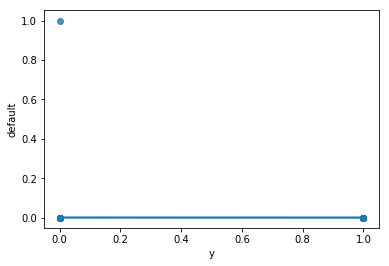

In [53]:
sns.regplot(x="y", y="default", data=df);

In [54]:
df = df.drop(['default'], axis=1)
#vi default khong anh huong thay doi y nen co the bo qua

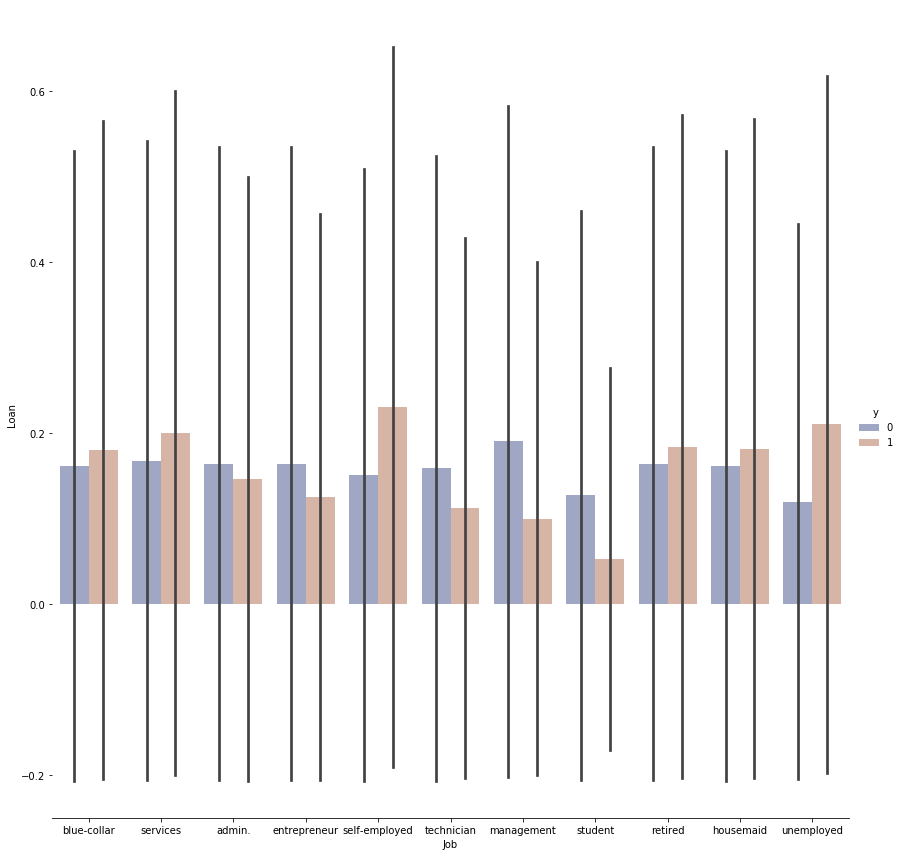

In [70]:
#danh gia anh huong job va loan len y
g = sns.catplot(
    data=df, kind="bar",
    x="job", y="loan", hue="y",
    ci="sd", palette="dark", alpha=0.4, height=12
)
g.despine(left=True)
g.set_axis_labels("Job", "Loan")

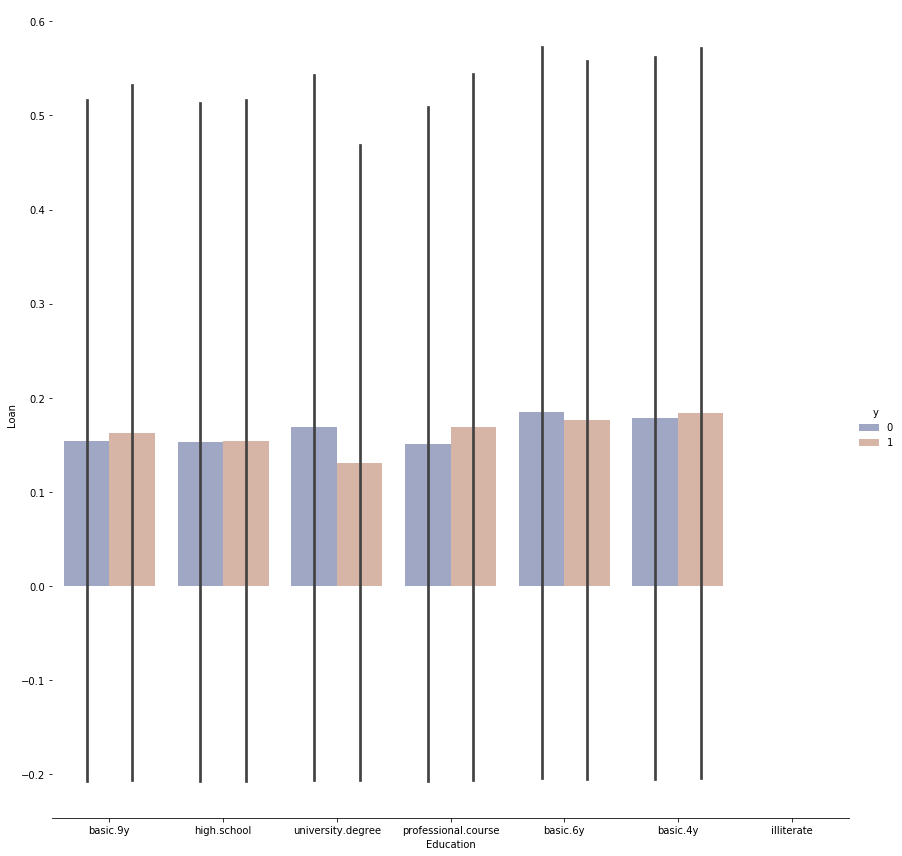

In [71]:
#danh gia anh huong education len y
g = sns.catplot(
    data=df, kind="bar",
    x="education", y="loan", hue="y",
    ci="sd", palette="dark", alpha=0.4, height=12
)
g.despine(left=True)
g.set_axis_labels("Education", "Loan")

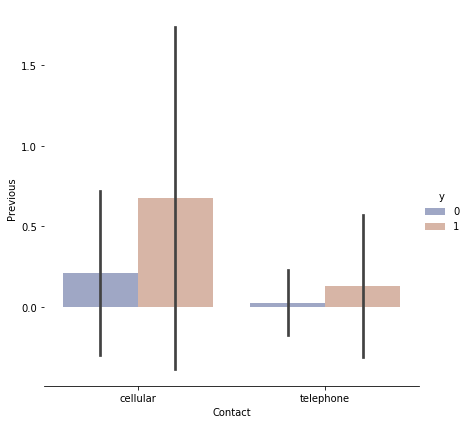

In [75]:
#danh gia loai lien he va lien he truoc anh huong len y
g = sns.catplot(
    data=df, kind="bar",
    x="contact", y="previous", hue="y",
    ci="sd", palette="dark", alpha=0.4, height=6
)
g.despine(left=True)
g.set_axis_labels("Contact", "Previous")

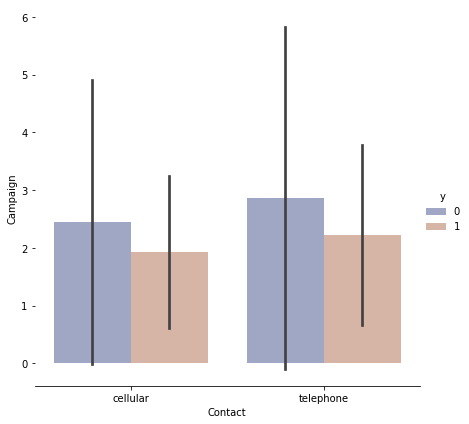

In [76]:
#danh gia so lan chạy chien dich truoc do cung loai contact len y
g = sns.catplot(
    data=df, kind="bar",
    x="contact", y="campaign", hue="y",
    ci="sd", palette="dark", alpha=0.4, height=6
)
g.despine(left=True)
g.set_axis_labels("Contact", "Campaign")

In [77]:
#cac du lieu danh gia tren cho thay cac thuoc tinh anh huong len y, nen giu 
df.head(10)
#du lieu sau khi lam sach

,age,job,marital,education,housing,loan,contact,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,1,0,cellular,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,married,high.school,0,0,telephone,346,4,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,1,0,telephone,227,1,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,1,0,telephone,17,3,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,1,0,cellular,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,married,university.degree,0,0,cellular,128,3,2,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,married,university.degree,1,0,cellular,290,4,0,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,1,0,cellular,44,2,0,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,married,professional.course,0,0,cellular,68,1,1,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,0,0,telephone,170,1,0,1.1,93.994,-36.4,4.855,5191.0,0
